In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [72]:
first_region = [1, 1.5]
second_region = [3, 4]
total_region = first_region[1]-first_region[0] + second_region[1]-second_region[0]
scale = 3
n_samples = 10000

In [73]:
exp_samples = np.random.exponential(scale, n_samples)
exp_samples = exp_samples[((exp_samples < first_region[1]) & (exp_samples > first_region[0])) |
                          ((exp_samples < second_region[1]) & (exp_samples > second_region[0]))]

In [74]:
unif_samples = np.asarray([np.random.choice([np.random.uniform(*first_region),
                                 np.random.uniform(*second_region)],
                                 p=[(first_region[1]-first_region[0])/total_region,
                                    (second_region[1]-second_region[0])/total_region]
                                 ) for _ in range(n_samples)])
weights = 1/scale * np.exp(-unif_samples/scale) * total_region

Text(0, 0.5, 'number of entries (weighted)')

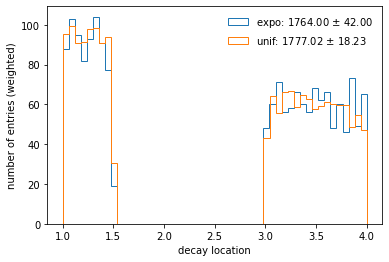

In [82]:
plt.hist(exp_samples, 
         bins=50, 
         label=f'expo: {len(exp_samples):.2f} $\pm$ {np.sqrt(len(exp_samples)):.2f}', 
         histtype='step');
plt.hist(unif_samples, 
         weights=weights, 
         bins=50, 
         label=f'unif: {weights.sum():.2f} $\pm$ {np.sqrt((weights**2).sum()):.2f}', 
         histtype='step');
plt.legend(frameon=False)
plt.xlabel('decay location')
plt.ylabel('number of entries (weighted)')

In [80]:
relative_uncertainty_expo = []
relative_uncertainty_unif = []
scales = [0.5, 1, 1.5, 3, 5]

for scale in scales:
    exp_samples = np.random.exponential(scale, n_samples)
    exp_samples = exp_samples[((exp_samples < first_region[1]) & (exp_samples > first_region[0])) |
                          ((exp_samples < second_region[1]) & (exp_samples > second_region[0]))]
    relative_uncertainty_expo.append(1/np.sqrt(len(exp_samples)))
    
    unif_samples = np.asarray([np.random.choice([np.random.uniform(*first_region),
                                 np.random.uniform(*second_region)],
                                 p=[(first_region[1]-first_region[0])/total_region,
                                    (second_region[1]-second_region[0])/total_region]
                                 ) for _ in range(n_samples)])
    weights = 1/scale * np.exp(-unif_samples/scale) * total_region
    relative_uncertainty_unif.append(np.sqrt((weights**2).sum())/weights.sum())

Text(0, 0.5, 'relative uncertainty on the integral')

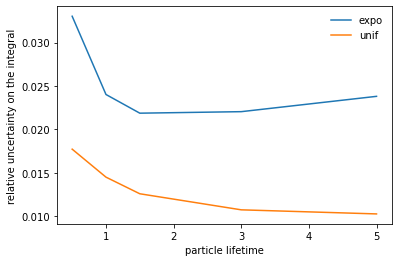

In [83]:
plt.plot(scales, relative_uncertainty_expo, label='expo')
plt.plot(scales, relative_uncertainty_unif, label='unif')
plt.legend(frameon=False)
plt.xlabel('particle lifetime')
plt.ylabel('relative uncertainty on the integral')

In [84]:
rng = np.random.default_rng()

In [93]:
probabilities = rng.uniform(0, 1, (100, 3))
probabilities /= probabilities.sum(axis=1)[:,np.newaxis]

In [95]:
a = rng.uniform(2, 3, (100, 3))

In [98]:
rng.choice(a, p=probabilities, axis=1)

ValueError: p must be 1-dimensional